In [0]:
# Install dependencies ... para poder imprimir el modelo en PNG
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

# Restart runtime to allow Jupyter to know the changes above

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Double check with Python 3


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%tensorflow_version 1.x

In [0]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [0]:
PATH = "/content/drive/My Drive/Colab Notebooks/archivos"
DIR = PATH + "/datos_9_7_12.csv"

In [0]:
df = pd.read_csv(DIR)

In [0]:
df[:10]

,87,75,77,86,104,116,116.1,118,118.1,123,108,96,100,106,119,2
0,140,128,127,103,81,125,126,124,122,119,127,127,124,118,99,2
1,70,82,87,122,135,123,121,123,124,124,90,97,106,125,128,2
2,130,124,94,83,68,126,125,122,118,115,128,127,112,97,86,2
3,84,92,118,134,130,119,120,124,126,126,97,106,124,127,126,2
4,122,93,86,68,85,123,120,121,121,121,128,115,99,89,97,2
5,92,120,134,129,121,122,123,125,126,125,106,125,127,128,126,2
6,96,77,69,87,91,121,118,116,119,121,111,90,84,98,105,2
7,118,137,130,122,91,126,125,126,123,121,126,127,126,123,111,2
8,85,67,85,93,116,124,128,123,123,122,96,83,96,106,122,2
9,134,131,120,92,76,124,124,125,123,119,126,125,127,115,98,2


In [0]:
df.shape

(471, 16)

In [0]:
# dividir lla información en  carasteristicas(datos)y etiquetas 
datos= df.values[:,:15]
etiquetas= df.values[:,15]

In [0]:
#los dato deben estar "normalizados" entes valores de 0 a 1
datos=datos/255

In [0]:
datos

array([[0.54901961, 0.50196078, 0.49803922, ..., 0.48627451, 0.4627451 ,
        0.38823529],
       [0.2745098 , 0.32156863, 0.34117647, ..., 0.41568627, 0.49019608,
        0.50196078],
       [0.50980392, 0.48627451, 0.36862745, ..., 0.43921569, 0.38039216,
        0.3372549 ],
       ...,
       [0.34117647, 0.37647059, 0.40784314, ..., 0.49803922, 0.49411765,
        0.50980392],
       [0.36862745, 0.41568627, 0.40392157, ..., 0.49411765, 0.50588235,
        0.50588235],
       [0.41176471, 0.41568627, 0.36078431, ..., 0.50588235, 0.50196078,
        0.49411765]])

In [0]:
# One Hot Enconder
encoder = LabelEncoder()
encoder.fit(etiquetas)
encoded_Y = encoder.transform(etiquetas)
etiquetas_ = np_utils.to_categorical(encoded_Y)

In [0]:
# dividir en Train y Test
X_train, X_test, y_train, y_test = train_test_split(datos, etiquetas_, test_size=0.2, random_state=42)

In [0]:
# se dividen en tres ramas, los vaores de los ejes X, Y, Z de lecturas del acelerómetro
datos_x= X_train[:,:5]   # los primero 5 datos corresponden a los valors de X
datos_y= X_train[:,5:10] # los datos del 5 al 10 corresponden a los valors de Y
datos_z= X_train[:,10:15]# y los datos de 10 al 15 corresponden a los valors de Z

In [0]:
# lo mismo para el test
test_x= X_test[:,:5]   # los primero 5 datos corresponden a los valors de X
test_y= X_test[:,5:10] # los datos del 5 al 10 corresponden a los valors de Y
test_z= X_test[:,10:15]# y los datos de 10 al 15 corresponden a los valors de Z

In [0]:
# el modelo
input_tensor_1 = tf.keras.layers.Input(shape=(5,))
input_tensor_2 = tf.keras.layers.Input(shape=(5,))
input_tensor_3 = tf.keras.layers.Input(shape=(5,))

# primera entrada
a = tf.keras.layers.Dense(5, activation='relu', name='capa_1X')(input_tensor_1)
a = tf.keras.layers.Dense(4, activation='relu', name='capa_2X')(a)

# 2da entrada
b = tf.keras.layers.Dense(5, activation='relu', name='capa_1Y')(input_tensor_2)
b = tf.keras.layers.Dense(4, activation='relu', name='capa_2Y')(b)

# 3ra entrada
c = tf.keras.layers.Dense(5, activation='relu', name='capa_1Z')(input_tensor_3)
c = tf.keras.layers.Dense(4, activation='relu', name='capa_2Z')(c)

# unir las tres ramas
merge = tf.keras.layers.concatenate([a, b, c])

output_tensor = tf.keras.layers.Dense(3, activation='sigmoid', name='salida')(merge)

model = tf.keras.Model([input_tensor_1, input_tensor_2, input_tensor_3], output_tensor)

In [0]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
capa_1X (Dense)                 (None, 5)            30          input_13[0][0]                   
____________________________________________________________________________________________

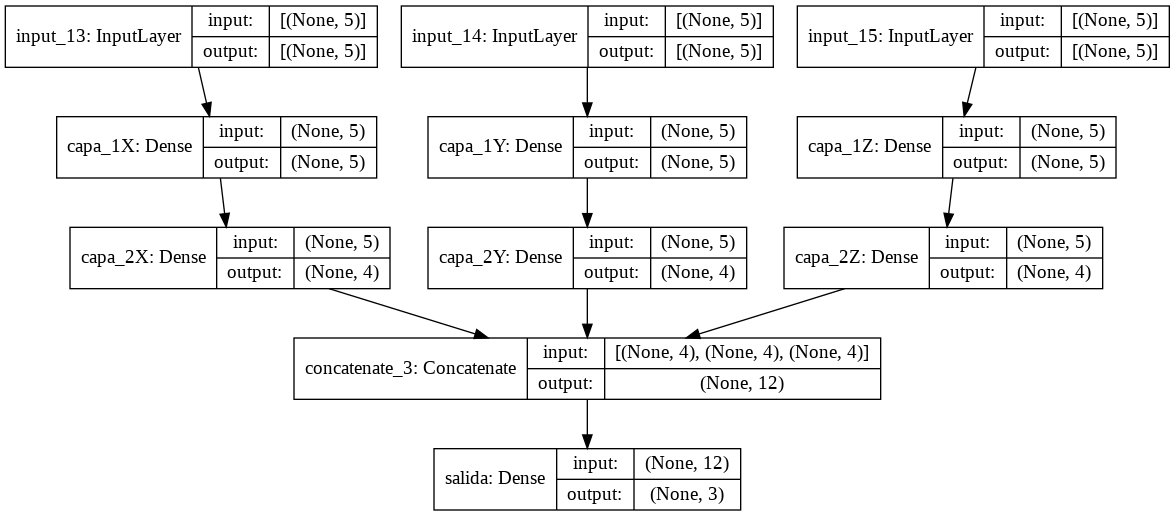

In [0]:
tf.keras.utils.plot_model(model, to_file ='model.png', show_shapes=True)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit([datos_x,datos_y, datos_z], y_train, epochs=250, batch_size=5)

Epoch 1/250
376/376 [==============================] - 1s 2ms/sample - loss: 1.1022 - acc: 0.3670
Epoch 2/250
376/376 [==============================] - 0s 1ms/sample - loss: 1.0997 - acc: 0.3617
Epoch 3/250
376/376 [==============================] - 0s 1ms/sample - loss: 1.0993 - acc: 0.3484
Epoch 4/250
376/376 [==============================] - 0s 1ms/sample - loss: 1.0989 - acc: 0.3484
Epoch 5/250
376/376 [==============================] - 0s 1ms/sample - loss: 1.0986 - acc: 0.2580
Epoch 6/250
376/376 [==============================] - 0s 1ms/sample - loss: 1.0977 - acc: 0.3378
Epoch 7/250
376/376 [==============================] - 0s 1ms/sample - loss: 1.0976 - acc: 0.2926
Epoch 8/250
376/376 [==============================] - 0s 1ms/sample - loss: 1.0972 - acc: 0.3484
Epoch 9/250
376/376 [==============================] - 0s 1ms/sample - loss: 1.0966 - acc: 0.2500
Epoch 10/250
376/376 [==============================] - 0s 1ms/sample - loss: 1.0957 - acc: 0.3271
Epoch 11/250
376/37

In [0]:
score = model.evaluate([test_x,test_y, test_z], y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

95/95 [==============================] - 0s 671us/sample - loss: 0.0311 - acc: 1.0000

acc: 100.00%


In [0]:
# extraer los pesos y sesgos para Arduino
capas = []
for lay in model.layers:
    print(lay.name)
    capas.append(lay.name) 
    print(lay.get_weights())
print(capas)

input_13
[]
input_14
[]
input_15
[]
capa_1X
[array([[ 1.4135503 , -1.3312597 ,  0.11104778,  0.4032895 , -0.03412413],
       [-0.06365932, -0.45207584,  0.9596708 ,  1.2080959 ,  0.76460844],
       [-0.23577435,  0.5894148 ,  0.6526333 ,  0.7782628 ,  0.92759115],
       [-0.02860433,  1.3293508 , -0.28789023,  0.18414328,  0.8474241 ],
       [-0.9986922 ,  1.2022767 ,  0.98081756, -0.43376493, -0.17432114]],
      dtype=float32), array([-0.01168893, -0.43542182, -0.38026318, -0.77428085, -0.54100645],
      dtype=float32)]
capa_1Y
[array([[-0.73921436, -0.03663075, -0.6726438 ,  0.9961619 , -0.32551277],
       [ 0.35952222,  0.21967328,  0.3976246 ,  1.693128  ,  0.68018377],
       [ 0.08722186, -0.18549341, -0.2697165 ,  1.6325083 , -0.27751157],
       [-0.5242195 , -0.48167613, -0.35588366,  0.34110576,  0.03712404],
       [ 0.2518047 , -0.5417725 ,  0.12052548,  1.6284298 , -0.41634086]],
      dtype=float32), array([0.       , 0.       , 0.       , 0.9441227, 0.       ],
  

In [0]:
# estos son los datos de tests para el Arduino
print(test_x[:5])
print(test_y[:5])
print(test_z[:5])
print(y_test[:5])

[[0.43921569 0.29803922 0.27843137 0.28235294 0.34509804]
 [0.51764706 0.50980392 0.45882353 0.35686275 0.31764706]
 [0.43921569 0.29803922 0.23529412 0.30588235 0.36078431]
 [0.39215686 0.42745098 0.4        0.35294118 0.37647059]
 [0.43921569 0.37647059 0.35294118 0.37254902 0.41960784]]
[[0.46666667 0.47843137 0.48627451 0.48627451 0.4745098 ]
 [0.49019608 0.48627451 0.49019608 0.49019608 0.49019608]
 [0.48235294 0.49019608 0.49411765 0.48627451 0.48627451]
 [0.4745098  0.48235294 0.4745098  0.47058824 0.4745098 ]
 [0.48235294 0.4745098  0.4745098  0.47843137 0.48235294]]
[[0.45490196 0.40784314 0.36078431 0.37254902 0.40784314]
 [0.49803922 0.49411765 0.4627451  0.4        0.34901961]
 [0.47058824 0.40392157 0.34117647 0.38823529 0.41960784]
 [0.49803922 0.49411765 0.49803922 0.50196078 0.50196078]
 [0.49411765 0.50588235 0.50980392 0.50980392 0.49803922]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
